## 1. Importing Required Libraries & Loading Dataset

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [25]:
vehicle_df = pd.read_csv("vehicle-1.csv")
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [26]:
vehicle_df.shape

(846, 19)

In [27]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [28]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### Observations:
1. The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. 
2. Dataset consists of 846 records with 19 features.
3. 19th feature being 'class' representing the type of vehicle.
4. Data set consists of some missing values as shown above. Since the data consists of limited records, it is preferred to impute the missing values with the mode characteristic by class of vehicle.

## 2. Imputing Missing Values with Mode Value by 'class'

In [29]:
vehicle_df['circularity'] = vehicle_df.groupby('class').circularity.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['distance_circularity'] = vehicle_df.groupby('class').distance_circularity.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['radius_ratio'] = vehicle_df.groupby('class').radius_ratio.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['scatter_ratio'] = vehicle_df.groupby('class').scatter_ratio.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['elongatedness'] = vehicle_df.groupby('class').elongatedness.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['scaled_variance'] = vehicle_df.groupby('class').scaled_variance.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['scaled_radius_of_gyration'] = vehicle_df.groupby('class').scaled_radius_of_gyration.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['skewness_about'] = vehicle_df.groupby('class').skewness_about.transform(lambda x: x.fillna(x.mode()[0]))

In [30]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              2
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    4
skewness_about                 0
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [31]:
vehicle_df.rename(columns = {'pr.axis_aspect_ratio':'pr_axis_aspect_ratio',
                             'pr.axis_rectangularity':'pr_axis_rectangularity',
                             'scaled_variance.1':'scaled_variance_1',
                             'scaled_radius_of_gyration.1':'scaled_radius_of_gyration_1',
                             'skewness_about.1':'skewness_about_1',
                             'skewness_about.2':'skewness_about_2'},
                              inplace = True)

In [32]:
vehicle_df['pr_axis_aspect_ratio'] = vehicle_df.groupby('class').pr_axis_aspect_ratio.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['pr_axis_rectangularity'] = vehicle_df.groupby('class').pr_axis_rectangularity.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['scaled_variance'] = vehicle_df.groupby('class').scaled_variance.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['scaled_variance_1'] = vehicle_df.groupby('class').scaled_variance_1.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['scaled_radius_of_gyration_1'] = vehicle_df.groupby('class').scaled_radius_of_gyration_1.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['skewness_about_1'] = vehicle_df.groupby('class').skewness_about_1.transform(lambda x: x.fillna(x.mode()[0]))
vehicle_df['skewness_about_2'] = vehicle_df.groupby('class').skewness_about_2.transform(lambda x: x.fillna(x.mode()[0]))

In [33]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr_axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr_axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance_1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration_1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about_1               846 non-null float64
skewness_about_2               846 non-null float64
hollows_ratio    

In [34]:
vehicle_df.isnull().any().sum()

0

We can proceed further as the missing have been filled

In [35]:
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.830969    6.143340   33.0   40.00   
distance_circularity         846.0   82.070922   15.757697   40.0   70.00   
radius_ratio                 846.0  168.849882   33.533696  104.0  141.00   
pr_axis_aspect_ratio         846.0   61.678487    7.883062   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.955083   33.231380  112.0  147.00   
elongatedness                846.0   40.921986    7.819022   26.0   33.00   
pr_axis_rectangularity       846.0   20.581560    2.593089   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.700946   31.412381  130.0  167.00   
scaled_variance_1            846.0  439.067376  176.675543  184.0  318.00   
scaled_radius_of_gyration    846.0  174.700946   32.546723  109.0  149.00   
scaled_radius_of_gyration_1  846.0   72.460993    7.480959   59.0   67.00   
skewness_about               846.0    6.338061    4.915537    0.0    2.00   
skewness_about_1             846.0   12.612293    8.935458    0.0    5.00   
skewness_about_2             846.0  188.917258    6.152520  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr_axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr_axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance_1            363.0  586.75  1018.0  
scaled_radius_of_gyration    173.0  198.00   268.0  
scaled_radius_of_gyration_1   72.0   75.00   135.0  
skewness_about                 5.0    9.00    22.0  
skewness_about_1              11.0   19.00    41.0  
skewness_about_2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

### Observations:
1. Long tails in values can be obseverd from higher maximum values in most of the variable and this shows the presence of outliers as well.
2. 15 variables are normally distributed as the mean & median are closer:
  a. compactness
  b. circularity
  c. pr_axis_aspect_ratio
  d. max.length_aspect_ratio
  e. pr_axis_rectangularity
  f. scaled_radius_of_gyration_1
  g. skewness_about
  h. skewness_about_2
  i. hollows_ratio
  j. distance_circularity
  k. radius_ratio
  l. elongatedness
  m. max.length_rectangularity
  n. scaled_radius_of_gyration
  o. skewness_about_1
3. scatter_ratio & scaled_variance_1 are positively skewed as the mean is more than median value
4. scaled_variance is negatively skewed

## 3. Visualizations

compactness                       AxesSubplot(0.125,0.808774;0.352273x0.0712264)
circularity                    AxesSubplot(0.547727,0.808774;0.352273x0.0712264)
distance_circularity              AxesSubplot(0.125,0.723302;0.352273x0.0712264)
radius_ratio                   AxesSubplot(0.547727,0.723302;0.352273x0.0712264)
pr_axis_aspect_ratio               AxesSubplot(0.125,0.63783;0.352273x0.0712264)
max.length_aspect_ratio         AxesSubplot(0.547727,0.63783;0.352273x0.0712264)
scatter_ratio                     AxesSubplot(0.125,0.552358;0.352273x0.0712264)
elongatedness                  AxesSubplot(0.547727,0.552358;0.352273x0.0712264)
pr_axis_rectangularity            AxesSubplot(0.125,0.466887;0.352273x0.0712264)
max.length_rectangularity      AxesSubplot(0.547727,0.466887;0.352273x0.0712264)
scaled_variance                   AxesSubplot(0.125,0.381415;0.352273x0.0712264)
scaled_variance_1              AxesSubplot(0.547727,0.381415;0.352273x0.0712264)
scaled_radius_of_gyration   

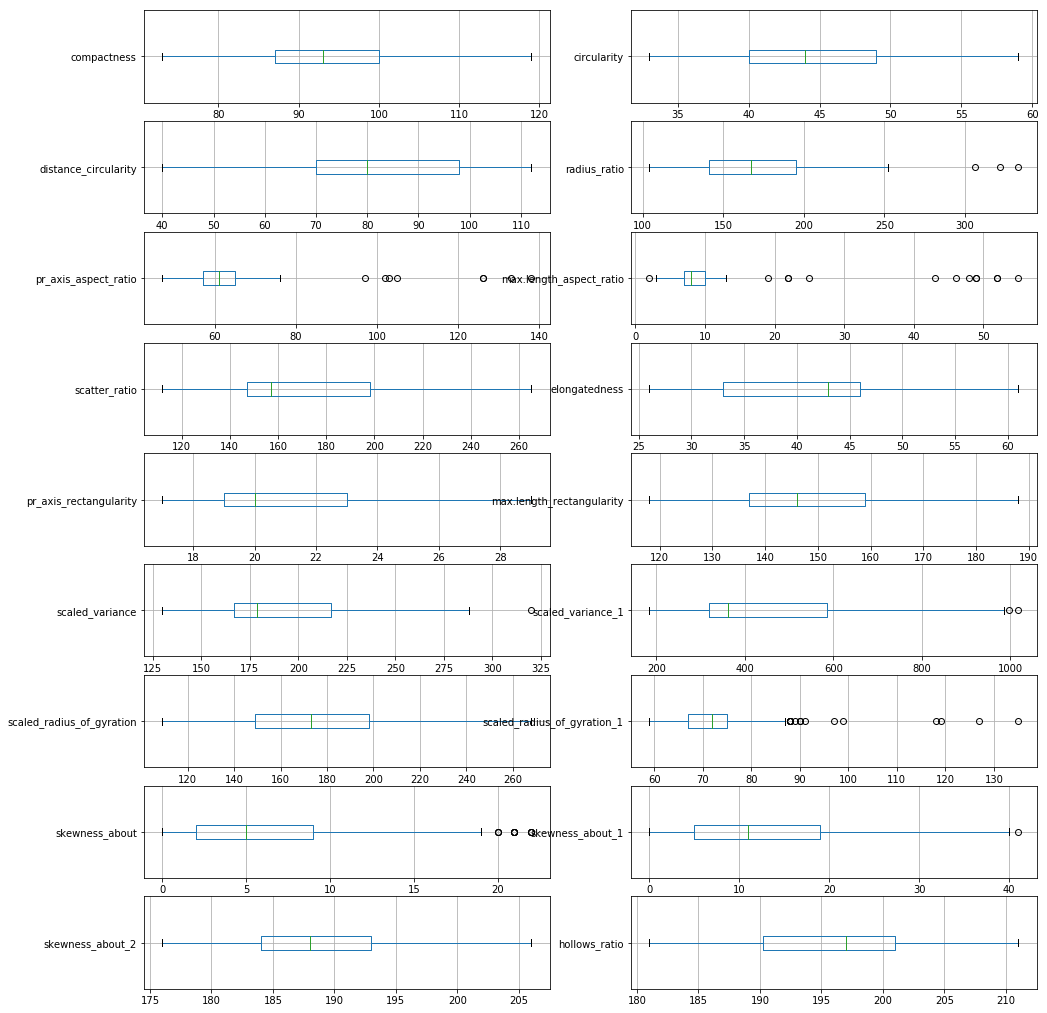

In [36]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

vehicle_df.plot(kind = 'box', subplots = 'True', 
                sharey = False, sharex = False, 
                layout = (9,2), grid = True, vert = False)

#### Outliers present in 5 out of 18 variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee41a77550>,
      dtype=object)

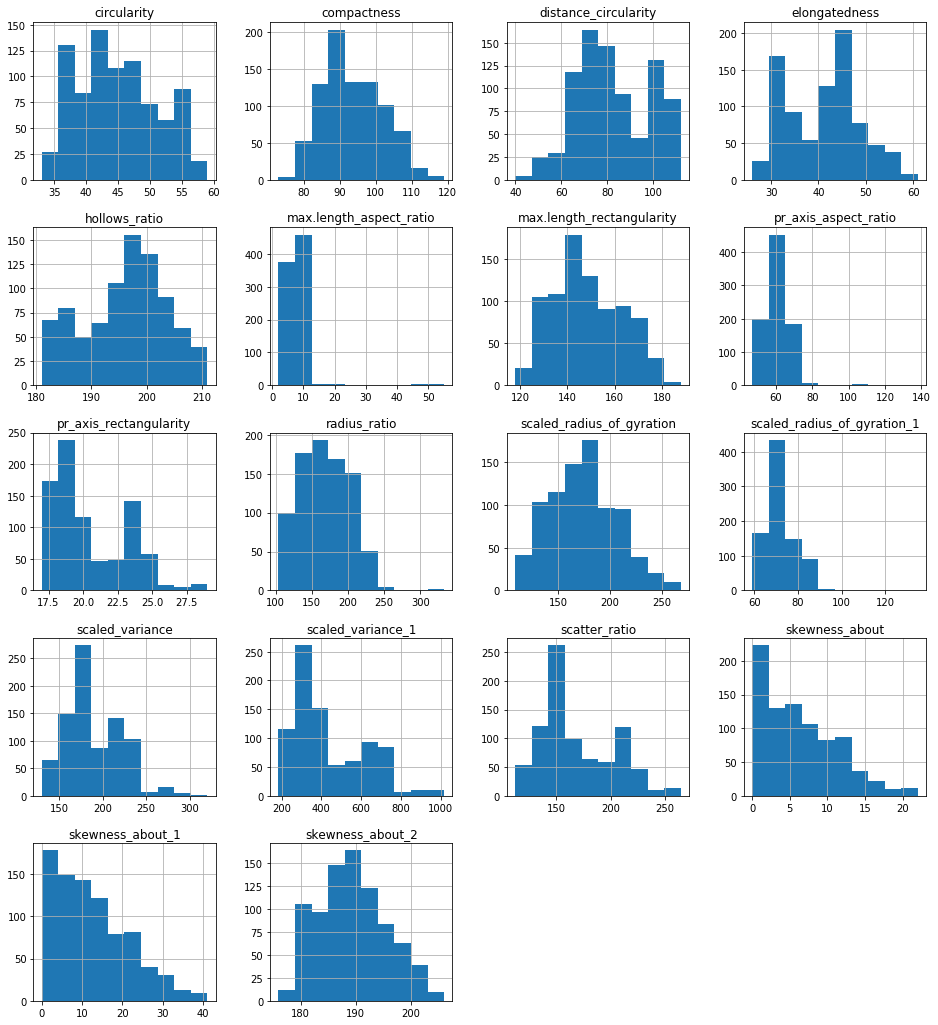

In [18]:
vehicle_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee40fd2f98>,
      dtype=object)

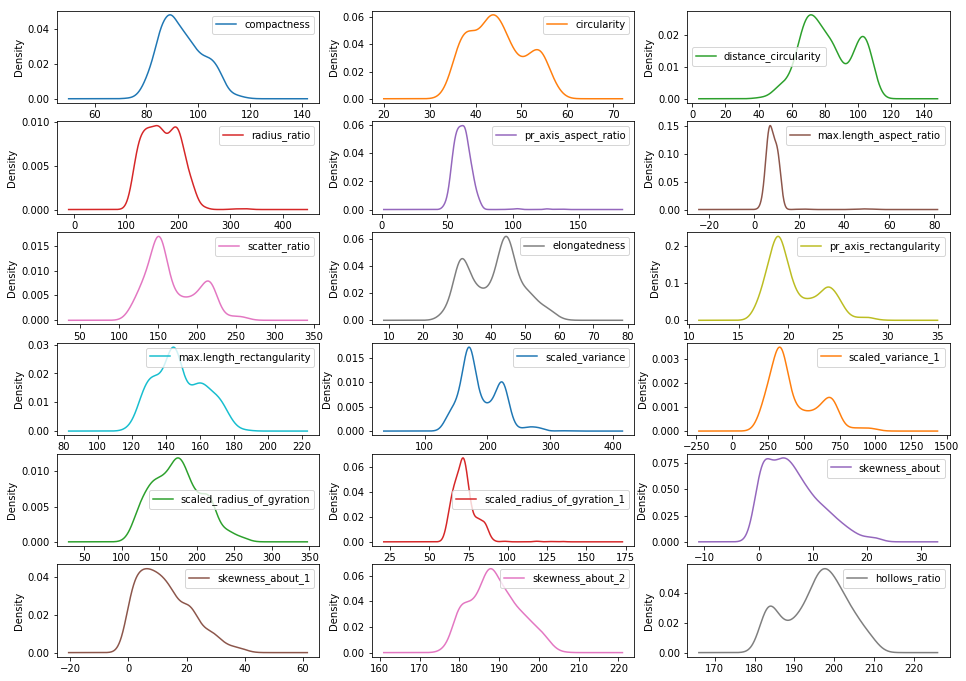

In [19]:
vehicle_df.plot(kind='density', subplots=True, sharex=False, layout = (9,3))

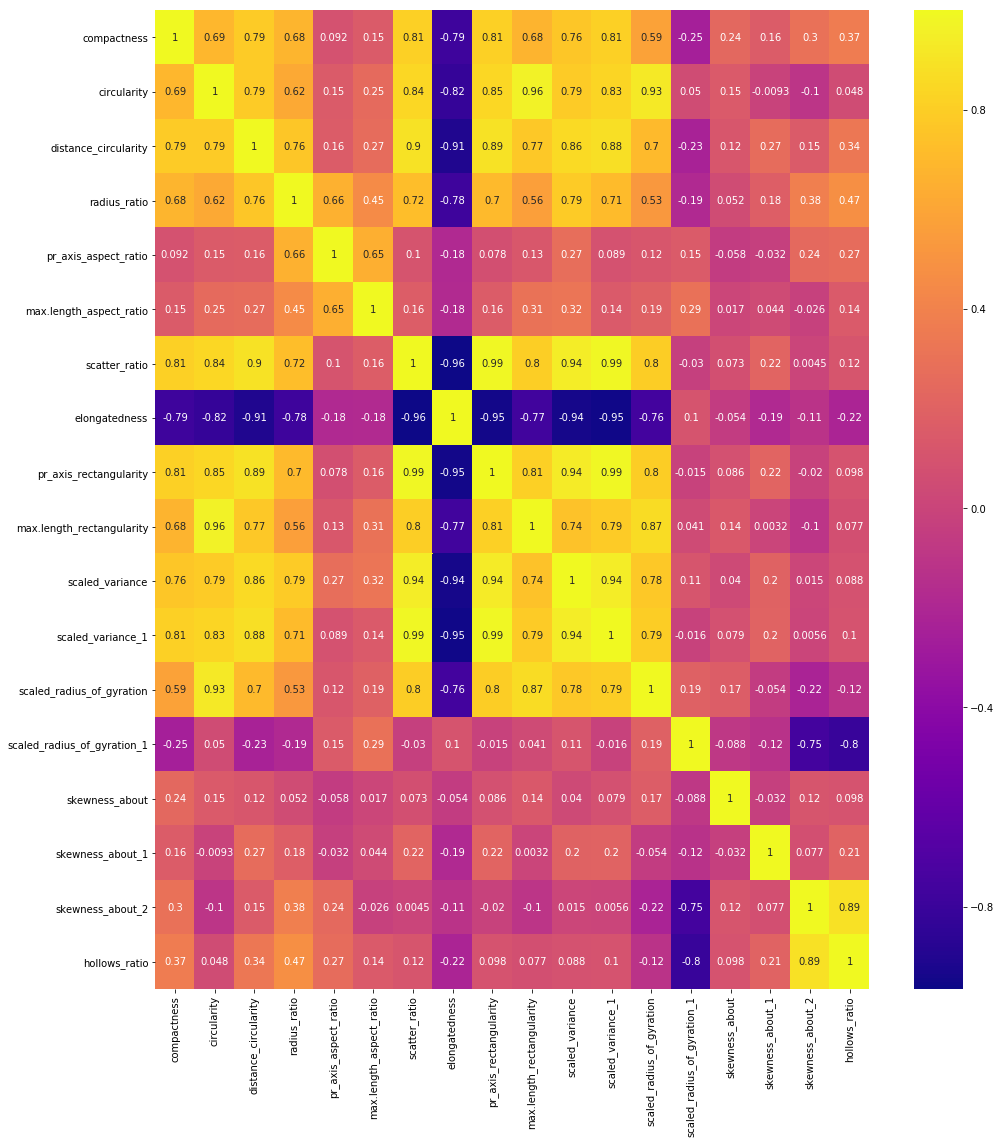

In [17]:
corr = vehicle_df.corr()
sns.heatmap(corr, annot = True, cmap = 'plasma')

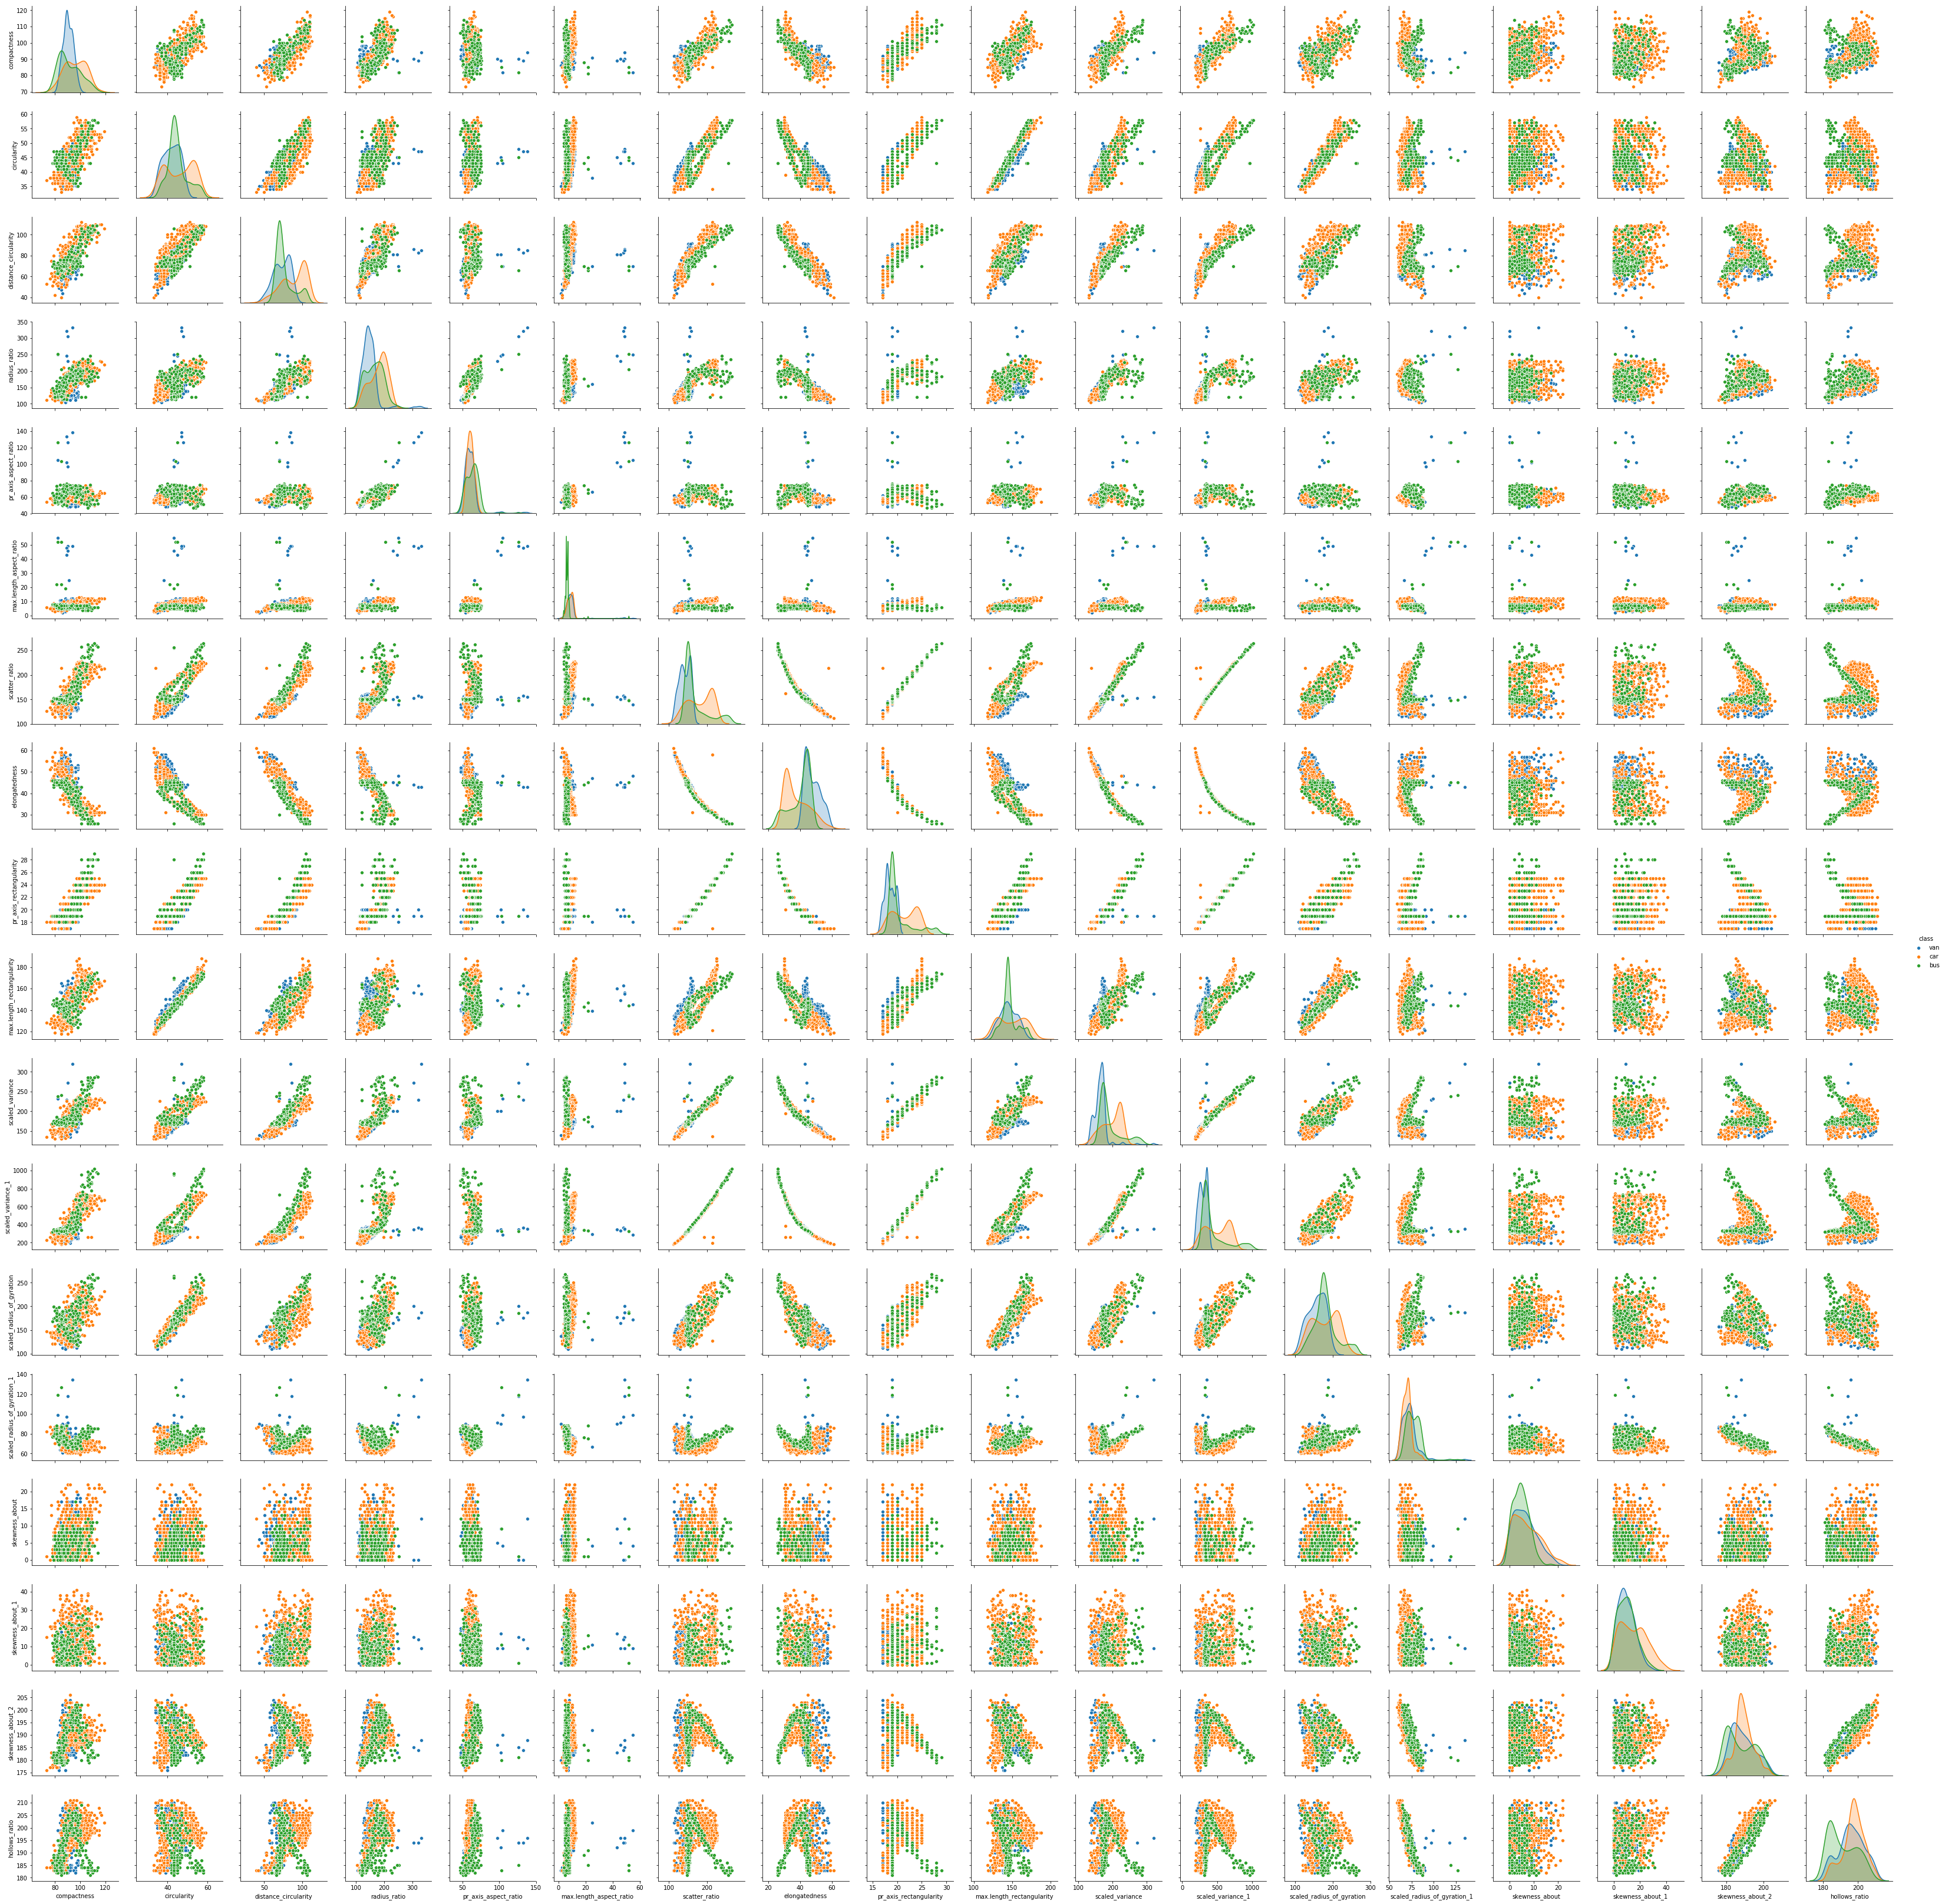

In [18]:
sns.pairplot(vehicle_df, hue = 'class')

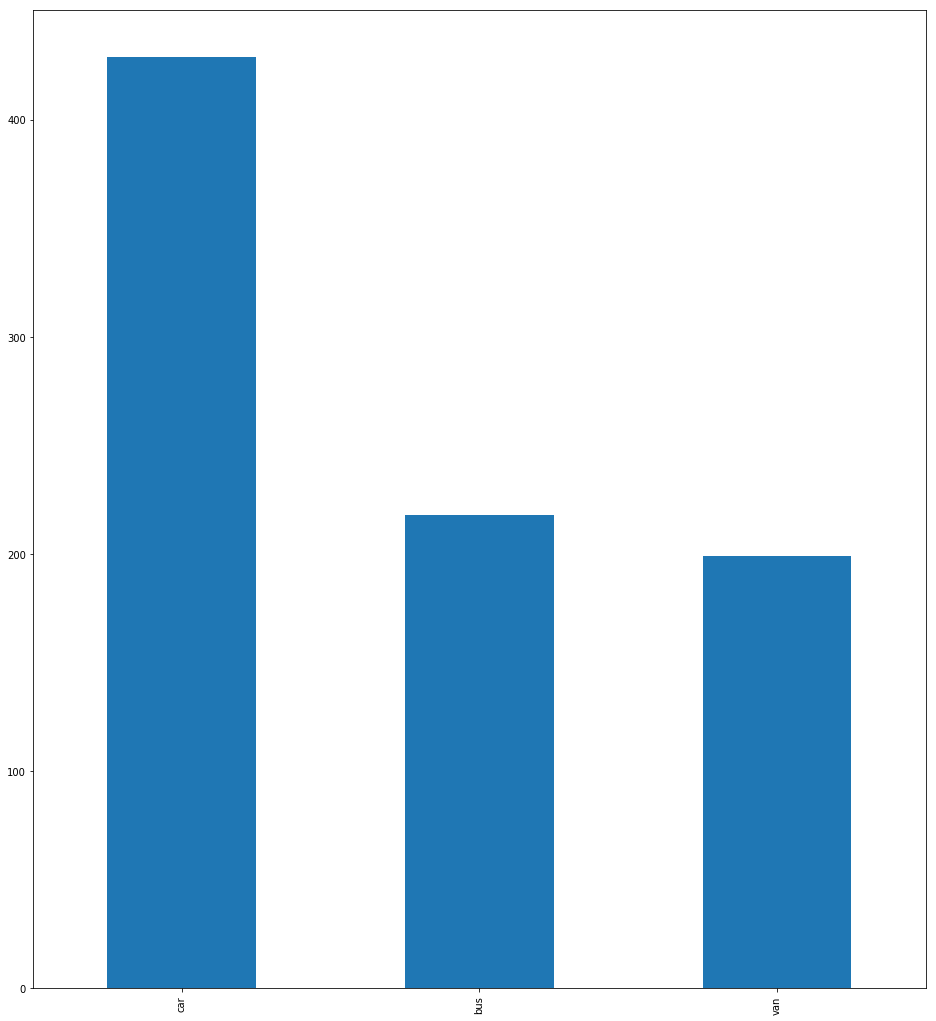

In [14]:
pd.value_counts(vehicle_df["class"]).plot(kind="bar")

### Observations:
1. Outliers can be ovserved in 5 out of 18 variables.
2. As observerd, in describe statement above, most of the data is normally distributed.
3. Linear relationships can be observed in many of the features.
4. Dataset is also not balanced. More records exist for vehilce class 'car' & records for 'bus' &'van' are closer.
5. Since there are many features with linear relationships, this can be ideal dataset for 'Principal Component Analysys' & reduce the possible number of dimensions.

## 4. Applying PCA

In [15]:
#Scaling the data so that total of all the observation would fall between +1 & -1
scaled_df = vehicle_df.drop('class', axis = 1).apply(zscore)
scaled_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.516153              0.058995      0.273025   
1    -0.325470    -0.623966              0.122494     -0.830996   
2     1.254193     0.841902              1.519463      1.198015   
3    -0.082445    -0.623966             -0.004503     -0.293905   
4    -1.054545    -0.135343             -0.766487      1.078661   

   pr_axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310102                 0.311542      -0.209416   
1             -0.593837                 0.094079      -0.600844   
2              0.548527                 0.311542       1.145526   
3              0.167739                 0.094079      -0.751394   
4              5.244911                 9.444962      -0.600844   

   elongatedness  pr_axis_rectangularity  max.length_rectangularity  \
0       0.137952               -0.224406                   0.758332   
1       0.521859               -0.610274                  -0.344578   
2      -1.141737                0.933200                   0.689401   
3       0.649828               -0.610274                  -0.344578   
4       0.521859               -0.610274                  -0.275646   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0        -0.404568          -0.340188                   0.285883   
1        -0.595689          -0.617697                  -0.513441   
2         1.092542           1.109653                   1.392639   
3        -0.914223          -0.736629                  -1.466481   
4         1.665903          -0.646014                   0.408856   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                    -0.329162       -0.068815          0.379355   
1                    -0.061659        0.541856          0.155395   
2                     0.072093        1.559641         -0.404504   
3                    -1.265425       -0.068815         -0.292524   
4                     7.294689        0.541856         -0.180544   

   skewness_about_2  hollows_ratio  
0         -0.311806       0.183957  
1          0.013456       0.452977  
2         -0.149175       0.049447  
3          1.639768       1.529056  
4         -1.450224      -1.699181

In [16]:
covMatrix = np.cov(scaled_df,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68777578  0.79116719  0.68455711  0.09171137  0.14842463
   0.81061596 -0.78814987  0.81397236  0.67694334  0.76369517  0.81179644
   0.58610793 -0.25289697  0.23950086  0.15942753  0.29889296  0.36598446]
 [ 0.68777578  1.00118343  0.793371    0.61788952  0.15501519  0.25238182
   0.84541491 -0.82094002  0.84708468  0.96326741  0.79324028  0.83505385
   0.92690514  0.04990947  0.14726504 -0.00933391 -0.10328391  0.04854624]
 [ 0.79116719  0.793371    1.00118343  0.76380903  0.15968283  0.26553209
   0.90013933 -0.91089575  0.89361975  0.77428748  0.8604338   0.88333523
   0.70542445 -0.23091705  0.11854385  0.26788958  0.14884064  0.3365334 ]
 [ 0.68455711  0.61788952  0.76380903  1.00118343  0.66100597  0.45064065
   0.72539735 -0.78356397  0.70154337  0.56565357  0.78693705  0.70967679
   0.53012045 -0.18699529  0.05197553  0.1766767   0.3828685   0.47467947]
 [ 0.09171137  0.15501519  0.15968283  0.66100597  1.00118343  0.64907418
   0.10266806 -0.18319454  0.07779

In [17]:
#feeding all the features to the PCA model
pca = PCA(n_components=18)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
#Eigan Values
print(pca.explained_variance_)

[9.38226581 3.0197366  1.90258345 1.17964434 0.91929929 0.53864542
 0.35841074 0.22273127 0.16124099 0.09231544 0.06699891 0.04616915
 0.03746162 0.03211539 0.02276244 0.01881349 0.01019684 0.00991058]


In [19]:
#Eigan Vectors
print(pca.components_)

[[ 2.75681646e-01  2.93724465e-01  3.04826328e-01  2.66123731e-01
   8.04621083e-02  9.73839596e-02  3.16237461e-01 -3.14006787e-01
   3.14583013e-01  2.83112971e-01  3.09354313e-01  3.13397776e-01
   2.72188560e-01 -2.17930913e-02  4.24537996e-02  5.93684583e-02
   3.05061415e-02  7.46167544e-02]
 [-1.26179575e-01  1.24915144e-01 -7.42260116e-02 -1.91838451e-01
  -1.23122851e-01  9.86881112e-03  4.92081188e-02  1.17649158e-02
   6.21686293e-02  1.16611543e-01  6.15173971e-02  5.52270220e-02
   2.09421944e-01  4.88466967e-01 -5.52229267e-02 -1.22998543e-01
  -5.40286229e-01 -5.39911466e-01]
 [-1.20526157e-01 -2.34167173e-02 -5.55501879e-02  2.75393992e-01
   6.41473061e-01  5.92459173e-01 -9.78969159e-02  5.74588888e-02
  -1.09888291e-01 -1.56302867e-02  5.59089845e-02 -1.08823740e-01
  -3.02184638e-02  2.86595097e-01 -1.14123945e-01 -7.58178197e-02
   6.94884065e-03  3.81780984e-02]
 [ 7.94201630e-02  1.89705316e-01 -6.88748580e-02 -4.34610912e-02
   3.10720364e-02  3.08551411e-02 -9.

In [20]:
pd.DataFrame(pca.components_.T, index=scaled_df.columns)

0         1         2         3         4   \
compactness                  0.275682 -0.126180 -0.120526  0.079420  0.070389   
circularity                  0.293724  0.124915 -0.023417  0.189705 -0.085309   
distance_circularity         0.304826 -0.074226 -0.055550 -0.068875  0.040877   
radius_ratio                 0.266124 -0.191838  0.275394 -0.043461 -0.045008   
pr_axis_aspect_ratio         0.080462 -0.123123  0.641473  0.031072 -0.042096   
max.length_aspect_ratio      0.097384  0.009869  0.592459  0.030855  0.211471   
scatter_ratio                0.316237  0.049208 -0.097897 -0.099049 -0.017625   
elongatedness               -0.314007  0.011765  0.057459  0.084556  0.076911   
pr_axis_rectangularity       0.314583  0.062169 -0.109888 -0.091202  0.000366   
max.length_rectangularity    0.283113  0.116612 -0.015630  0.189771 -0.061896   
scaled_variance              0.309354  0.061517  0.055909 -0.122664  0.001794   
scaled_variance_1            0.313398  0.055227 -0.108824 -0.091646 -0.020283   
scaled_radius_of_gyration    0.272189  0.209422 -0.030218  0.201174 -0.062907   
scaled_radius_of_gyration_1 -0.021793  0.488467  0.286595 -0.066212  0.146845   
skewness_about               0.042454 -0.055223 -0.114124  0.602377  0.730706   
skewness_about_1             0.059368 -0.122999 -0.075818 -0.665975  0.597273   
skewness_about_2             0.030506 -0.540286  0.006949  0.104694 -0.100250   
hollows_ratio                0.074617 -0.539911  0.038178  0.047137 -0.029508   

                                   5         6         7         8         9   \
compactness                  0.142671  0.449126 -0.562807 -0.492384 -0.261044   
circularity                 -0.302127 -0.249337 -0.177488 -0.025009  0.104791   
distance_circularity        -0.139952  0.072781  0.436459 -0.164903 -0.219134   
radius_ratio                 0.245036 -0.180433  0.113550 -0.245201 -0.037933   
pr_axis_aspect_ratio         0.239698 -0.395396 -0.071876 -0.264945  0.104478   
max.length_aspect_ratio     -0.417845  0.505446  0.158458  0.150239 -0.111412   
scatter_ratio                0.116772  0.067109  0.095511  0.051268  0.168135   
elongatedness               -0.145448  0.013376 -0.216180 -0.157176 -0.140192   
pr_axis_rectangularity       0.095472  0.097706  0.063156  0.017938  0.197969   
max.length_rectangularity   -0.460395 -0.106276 -0.246580 -0.058167  0.463922   
scaled_variance              0.238874  0.116988  0.040641  0.294797 -0.134483   
scaled_variance_1            0.159946  0.085248  0.042447  0.093449  0.170110   
scaled_radius_of_gyration   -0.134787 -0.373570 -0.108721  0.245088 -0.685694   
scaled_radius_of_gyration_1  0.238232  0.108103 -0.340180  0.309782  0.116448   
skewness_about               0.204585 -0.080451  0.156736  0.025148  0.099335   
skewness_about_1            -0.196545 -0.285795 -0.208562  0.006987 -0.034675   
skewness_about_2             0.157185  0.019014 -0.312246  0.513043  0.017261   
hollows_ratio               -0.240953  0.014826 -0.029607  0.173910  0.060186   

                                   10        11        12        13        14  \
compactness                  0.046589  0.008139  0.148483  0.082534  0.015771   
circularity                 -0.000368 -0.186876  0.021649 -0.180656 -0.540136   
distance_circularity         0.692879  0.040996 -0.262615  0.110981 -0.170680   
radius_ratio                -0.138633 -0.224959 -0.029789 -0.673077 -0.049835   
pr_axis_aspect_ratio         0.054654  0.164106 -0.042870  0.446797  0.068097   
max.length_aspect_ratio     -0.260642 -0.139225  0.025428  0.077850 -0.086833   
scatter_ratio               -0.203470  0.103776  0.035789  0.099734 -0.125121   
elongatedness               -0.102956  0.220619 -0.781623 -0.207421 -0.001796   
pr_axis_rectangularity      -0.244310  0.247441 -0.181943  0.107874 -0.078916   
max.length_rectangularity    0.152896 -0.132686 -0.108168  0.016660  0.463742   
scaled_variance              0.082464 -0.169445 -0.173420 -0.175

In [21]:
# % of variation explained by each Eigan Vector
print(pca.explained_variance_ratio_)

[0.52062087 0.16756484 0.10557414 0.06545833 0.05101181 0.02988937
 0.01988817 0.01235933 0.00894724 0.00512257 0.00371776 0.00256192
 0.00207874 0.00178208 0.00126309 0.00104396 0.00056582 0.00054994]


Text(0.5, 0, 'EigenValue')

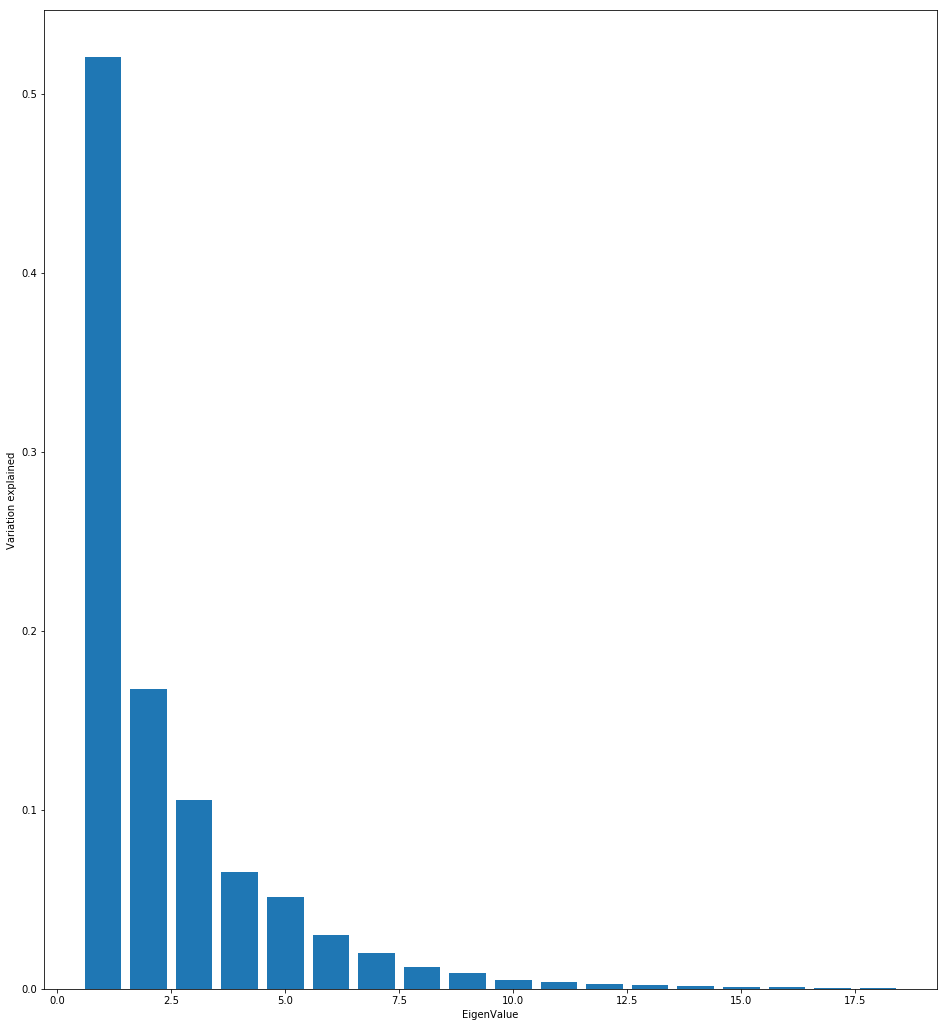

In [22]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha= 1, align='center')
plt.ylabel('Variation explained')
plt.xlabel('EigenValue')

Text(0.5, 0, 'eigen Value')

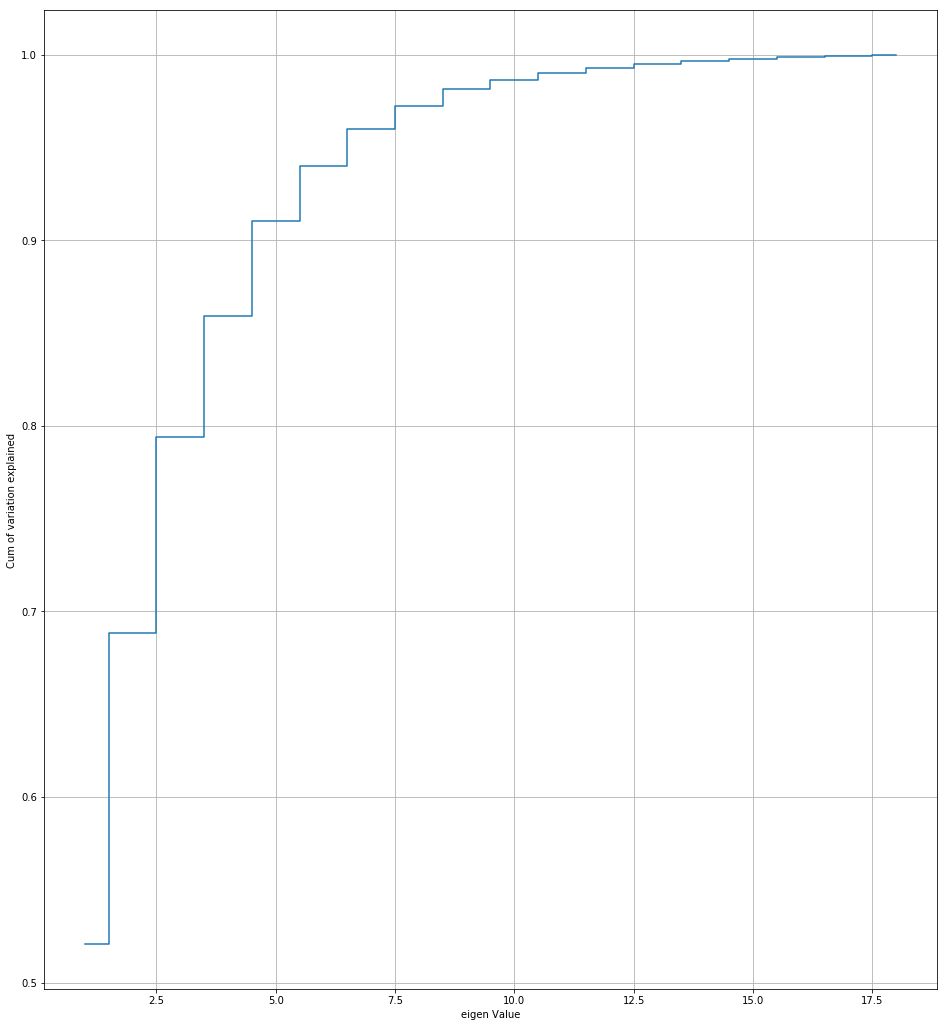

In [23]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.grid()
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')

### Observation:
1. Around 9 components are covering the variation of 96%.
2. We can freeze the number of components to 9 for further analysis.

In [23]:
# 9 variables seem reasonable covering almost 96% variation
pca_revised = PCA(n_components=9)
pca_revised.fit(scaled_df)
print(pca_revised.components_)
print(pca_revised.explained_variance_ratio_)
scaled_pca = pca_revised.transform(scaled_df)

[[ 2.75681646e-01  2.93724465e-01  3.04826328e-01  2.66123731e-01
   8.04621083e-02  9.73839596e-02  3.16237461e-01 -3.14006787e-01
   3.14583013e-01  2.83112971e-01  3.09354313e-01  3.13397776e-01
   2.72188560e-01 -2.17930913e-02  4.24537996e-02  5.93684583e-02
   3.05061415e-02  7.46167544e-02]
 [-1.26179575e-01  1.24915144e-01 -7.42260116e-02 -1.91838451e-01
  -1.23122851e-01  9.86881112e-03  4.92081188e-02  1.17649158e-02
   6.21686293e-02  1.16611543e-01  6.15173971e-02  5.52270220e-02
   2.09421944e-01  4.88466967e-01 -5.52229267e-02 -1.22998543e-01
  -5.40286229e-01 -5.39911466e-01]
 [-1.20526157e-01 -2.34167173e-02 -5.55501879e-02  2.75393992e-01
   6.41473061e-01  5.92459173e-01 -9.78969159e-02  5.74588888e-02
  -1.09888291e-01 -1.56302867e-02  5.59089845e-02 -1.08823740e-01
  -3.02184638e-02  2.86595097e-01 -1.14123945e-01 -7.58178197e-02
   6.94884065e-03  3.81780984e-02]
 [ 7.94201630e-02  1.89705316e-01 -6.88748580e-02 -4.34610912e-02
   3.10720364e-02  3.08551411e-02 -9.

In [24]:
scaled_pca

array([[ 3.33859514e-01, -2.23280360e-01,  1.00205146e+00, ...,
        -9.01605425e-01, -3.69001313e-01, -8.59520096e-01],
       [-1.58867440e+00, -4.23332536e-01, -3.70228190e-01, ...,
         3.76021124e-01,  2.48111715e-01,  1.49283129e-01],
       [ 3.76360225e+00,  1.94069574e-01,  9.24452134e-02, ...,
        -3.41178760e-02,  4.88538586e-01, -3.08731852e-01],
       ...,
       [ 4.79989929e+00, -4.33051703e-04,  5.33588607e-01, ...,
         5.75043506e-01,  1.20829122e-01, -6.47875629e-01],
       [-3.29067481e+00, -1.01084459e+00, -3.65193700e-01, ...,
        -2.03011862e-01,  3.20886062e-01, -2.01002775e-01],
       [-4.76066523e+00,  3.30373488e-01, -5.73576011e-01, ...,
         5.23313375e-02, -2.40871561e-01, -4.39165337e-01]])

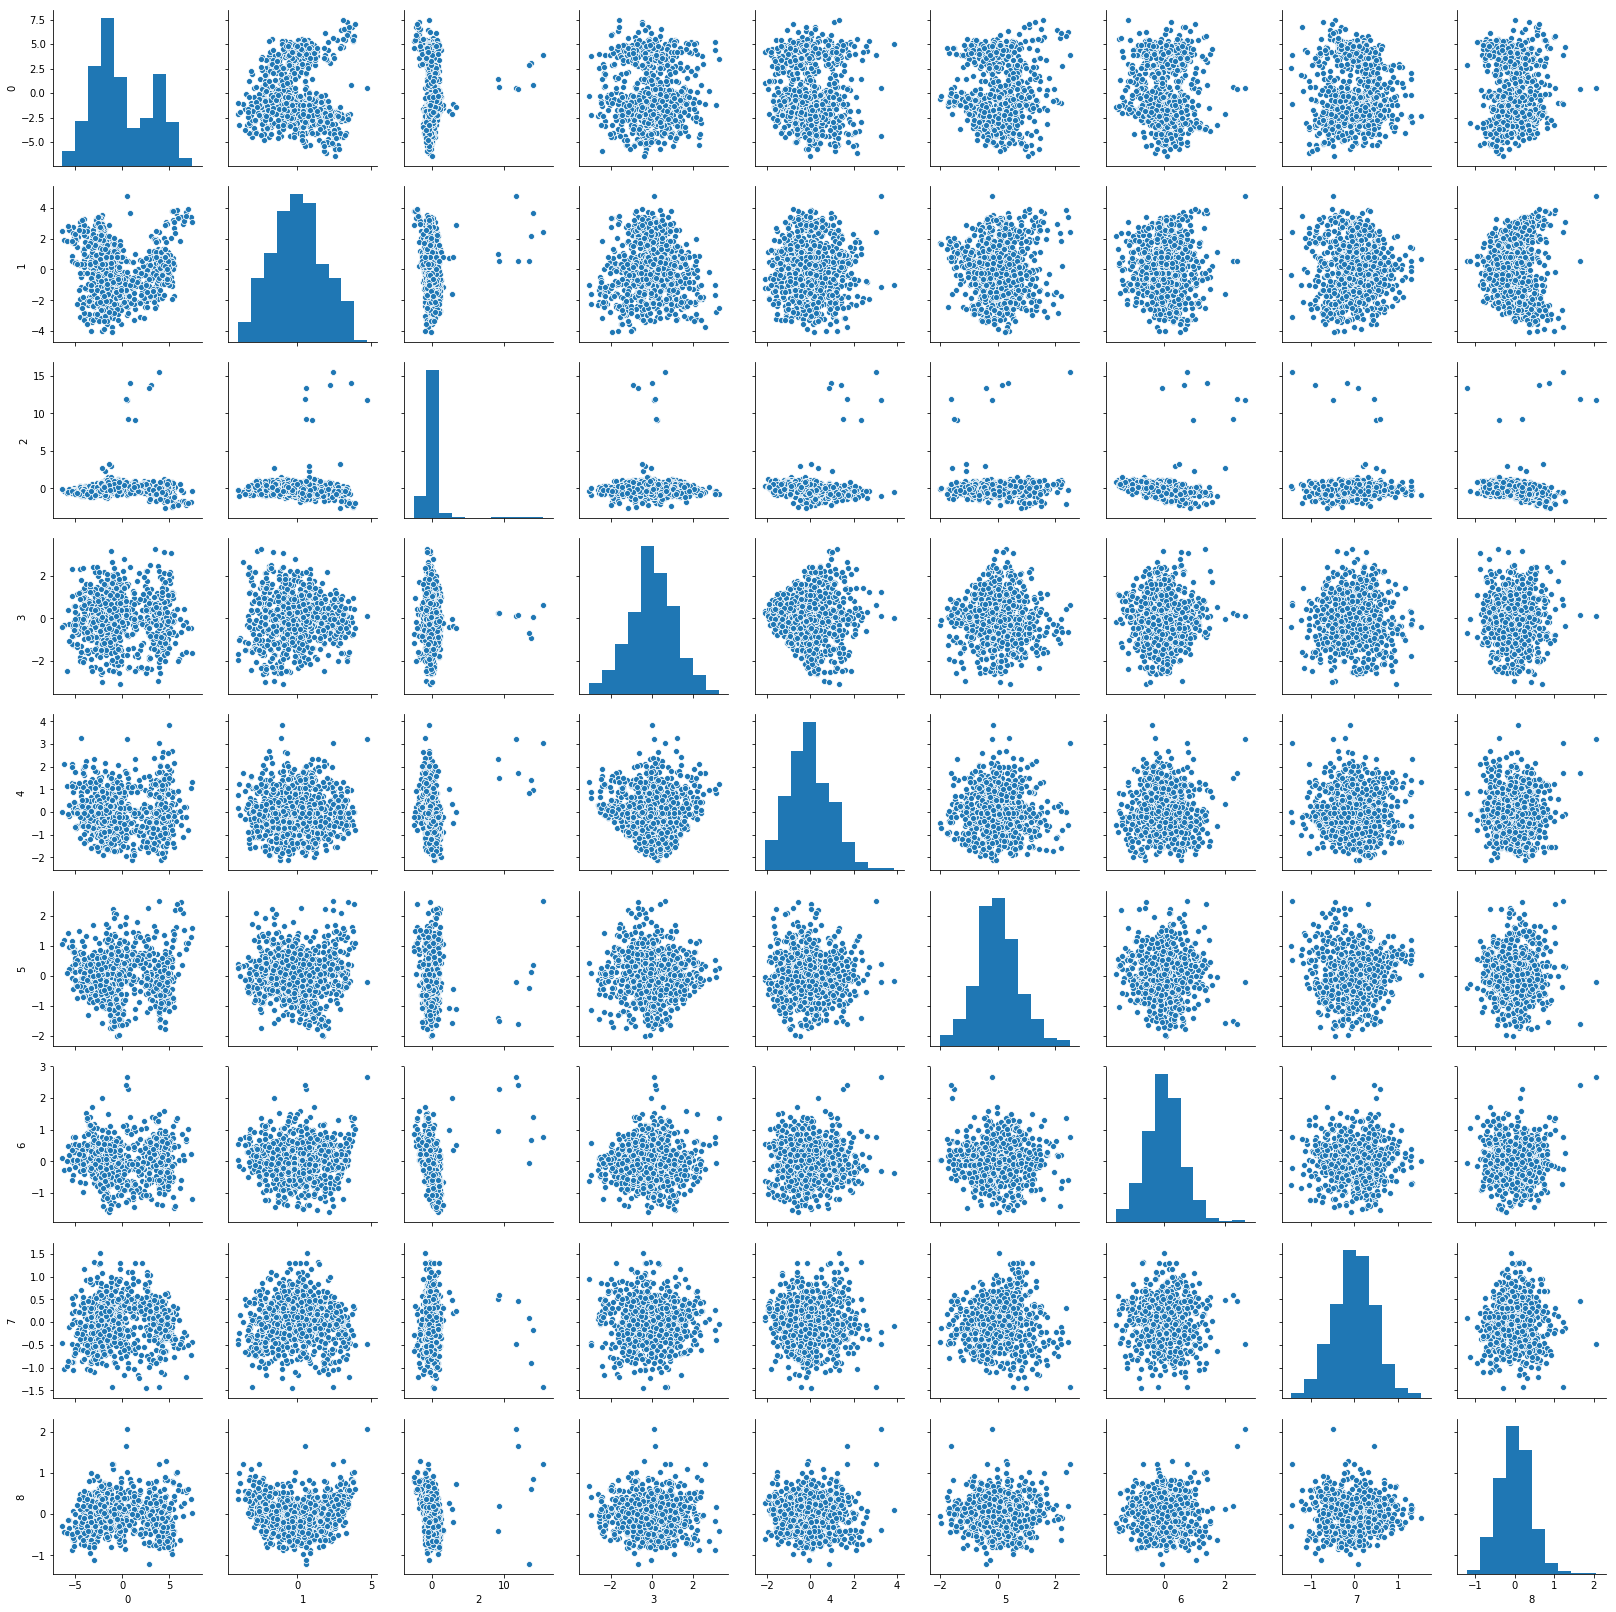

In [25]:
sns.pairplot(pd.DataFrame(scaled_pca))

### Observations:
1. All the 9 variable doesn't have linear relationships.
2. All the components are completely independent of each other.
3. Compontents like to would form a better prediction model.

## 5. Modelling on PCA & Dataset using Support Vector Machines

In [35]:
# Fit SVM Model
y = vehicle_df['class']
svmc = SVC()
svmc.fit(scaled_df, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
svmc.score(scaled_df,y)

0.9810874704491725

In [27]:
svmc_pca = SVC()
svmc_pca.fit(scaled_pca,y)
svmc_pca.score(scaled_pca,y)

0.9787234042553191

### Observations:
1. Accurcay of 98.11% can be observed when SVM applied on the whole dataset with default parameters.
2. When the same is applied on reduced components of PCA, 97.87% accruacy can be observed. 
3. With the reduction of 50% of features, the accuracy level is reduced to a very minimal extent.
4. We can say that PCA has done a good job here.
5. Even though the accuracy levels are high, these can't be taken as final score as the accuracy is calculated on the same data.
6. Performance of any model's accuracy can better interpreted when applied on test data.
7. Let's use Grid Search Cross Validation procedure to arrive at the best parameters for SVM modelling and also check the results further post applying on train & test data.

## 6. GridSearchCV - Parameter estimation using GridSearch with Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10, 20]
    gammas = [0.001, 0.01, 0.1, 1, 2]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [37]:
svc_param_selection(scaled_df, y, 10)

{'C': 20, 'gamma': 0.01}

In [38]:
svc_param_selection(scaled_pca, y, 10)

{'C': 10, 'gamma': 0.1}

####  The best parameters turned out to be diffierent for actual data set & PCA data set. Let's evaluate further to arrive at the best parameters ('C' & 'gamma' values for 'rbf' kernel).

Applying the SVM with the parameters from gridsearch cv on actual data set

In [40]:
#Revising with best parameters as per GridSearchCV (C=20 & gamma = 0.01)
svmc = SVC(C = 20, gamma = 0.01)
svmc.fit(scaled_df, y)
svmc.score(scaled_df,y)

0.9846335697399528

In [41]:
svmc = SVC(C = 20, gamma = 0.01)
svmc.fit(scaled_pca, y)
svmc.score(scaled_pca,y)

0.9704491725768322

SVM score on actual data set is better than the PCA data set while applied using the best paramters resulting from original data set

In [42]:
#Revising with best parameters as per GridSearchCV (C=10 & gamma = 0.1)
svmc = SVC(C = 10, gamma = 0.1)
svmc.fit(scaled_df, y)
svmc.score(scaled_df,y)

0.9988179669030733

In [43]:
svmc = SVC(C = 10, gamma = 0.1)
svmc.fit(scaled_pca, y)
svmc.score(scaled_pca,y)

0.991725768321513

1. SVM score is much better than the previous parameters and also the score from PCA data set and original data set are much closer.
2. However, these results can't be taken as the basis for selecting the best paramters.
3. Let's split the data set into train & test sets and check by applying the both the above best parameters on both original & PCA data sets.

In [47]:
# Let's apply the PCA best parameters for SVC and apply on the test data to see the accuracy levels
test = 0.3
seed = 25
X_train, X_test, y_train, y_test = train_test_split(scaled_df,y,test_size = test,random_state = seed)
SVM = svm.SVC(gamma = 0.1, C = 10)
SVM.fit(X_train, y_train)
SVM_Predict = SVM.predict(X_test)
SVM.score(X_test, y_test)*100

96.45669291338582

In [48]:
SVM = svm.SVC(gamma = 0.01, C = 20)
SVM.fit(X_train, y_train)
SVM_Predict = SVM.predict(X_test)
SVM.score(X_test, y_test)*100

99.21259842519686

In [49]:
test = 0.3
seed = 25
X_train, X_test, y_train, y_test = train_test_split(scaled_pca,y,test_size = test,random_state = seed)

In [50]:
SVM = svm.SVC(gamma = 0.1, C = 10)
SVM.fit(X_train, y_train)
SVM_Predict = SVM.predict(X_test)
SVM.score(X_test, y_test)*100

95.2755905511811

In [51]:
SVM = svm.SVC(gamma = 0.01, C = 20)
SVM.fit(X_train, y_train)
SVM_Predict = SVM.predict(X_test)
SVM.score(X_test, y_test)*100

97.24409448818898

## Final go:
1. SVM score on test data is much better when applied with the best parameters resulting from grid search CV on original data set which are C = 0.01 & gamma = 20.
2. These paramters produced higher accuracry when applied on both original data set and PCA data set.
3. Applying PCA in cases like these would definitely add value.
4. In this case, prediction model can be built with only half of the components & with paramters as
a. SVM kernel: 'rbf'
b. C =  20 &
c. gamma = 0.01.